<a href="https://colab.research.google.com/github/jcdumlao14/Startup-Success-Prediction/blob/main/1_Startup_MSE_RMSE_MAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Startup Success Prediction**

Can you predict if a start-up will succeed or fail?
--
## **using R2score/MSE/RMSE/MAE to Evaluate the model**

# **Context**

A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion. [Source of information: Wikipedia]

Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years. Predicting the success of a startup allows investors to find companies that have the potential for rapid growth, thereby allowing them to be one step ahead of the competition.

# **Objective**

The objective is to predict whether a startup which is currently operating turns into a success or a failure. The success of a company is defined as the event that gives the company's founders a large sum of money through the process of M&A (Merger and Acquisition) or an IPO (Initial Public Offering). A company would be considered as failed if it had to be shut down.

# **About the Data**

The data contains industry trends, investment insights and individual company information. There are 48 columns/features. Some of the features are:

*   age_first_funding_year – quantitative
*   age_last_funding_year – quantitative
*   relationships – quantitative
*   funding_rounds – quantitative
*   funding_total_usd – quantitative
*   milestones – quantitative
*   age_first_milestone_year – quantitative
*   age_last_milestone_year – quantitative
*   state – categorical
*   industry_type – categorical
*   has_VC – categorical
*   has_angel – categorical
*   has_roundA – categorical
*   has_roundB – categorical
*   has_roundC – categorical
*   has_roundD – categorical
*   avg_participants – quantitative
*   is_top500 – categorical

status(acquired/closed) – categorical (the target variable, if a startup is ‘acquired’ by some other organization, means the startup succeed) 

To load training dataset, use below command:
---------
import pandas as pd

startup_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/training_set_label.csv" )

To load the testing dataset, use below command:
--------
Load the test data (name it as test_data). You can load the data using the below command.

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/testing_set_label.csv')

Here the target column is deliberately not there as you need to predict it.

**Acknowledgement**
---
We would like to thank Ramkishan Panthena, for providing us this dataset. He is a Machine Learning Engineer at GMO.

# **Loading Libraries**

In [1]:
import numpy as np # for performing mathematical calculations
import pandas as pd # for handling and cleaning the dataset
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from warnings import simplefilter
simplefilter("ignore")
from sklearn.model_selection import train_test_split
import math
from collections import Counter
sns.set(style='white',context='notebook', palette='deep')
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,cross_val_score, StratifiedGroupKFold,learning_curve
from sklearn.metrics import f1_score
from sklearn.ensemble import StackingClassifier
import plotly.express as px
from matplotlib import style
#styling the outputs
font={'family':'sans-serif',
      'weight':'bold',
      'size':18}
plt.rc('font',**font)
style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


# **Loading Data**

In [3]:
startup_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/startupdata/training_set_label.csv')

In [4]:
startup_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


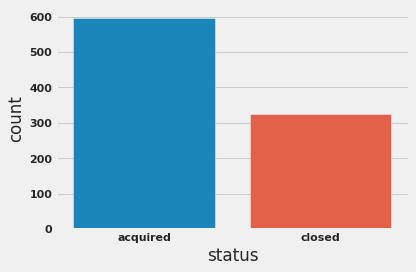

In [5]:
##check for Imbalance data
#count plot on single categorical variable
sns.countplot(x = 'status',data = startup_data)

#show the plot
plt.tight_layout()

In [6]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   founded_at                923 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [7]:
startup_data.shape

(923, 48)

From the shape command, we get to know that this data set has 923 rows and 48 columns (attributes).

Converting status column data into "1" and "0".

In [8]:
startup_data["status"] = np.where(startup_data["status"] == 'closed', 0, 1)

In [9]:
startup_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,0


# **Cleaning the Data**

In [10]:
#check for NULL values
startup_data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

Dropping some columns which are not useful.

In [11]:
startup_data = startup_data.drop(["Unnamed: 0", "Unnamed: 6","id","closed_at"], axis=1)


In [12]:
startup_data.shape 

(923, 44)

Checking null values in data set

In [13]:
startup_data.isnull().sum()

state_code                    0
latitude                      0
longitude                     0
zip_code                      0
city                          0
name                          0
founded_at                    0
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enterprise                 0
is_advertising                0
is_gamesvideo                 0
is_ecommerce                  0
is_biote

We have null values in closed_at, age_first_milestone_year, age_last_milestone_year and state_code.1 variables. Now, we need to solve this null value issue. to delaing with this issue, we are using "ffill" method to fill null values.



In [14]:
startup_data["age_first_milestone_year"] = startup_data["age_first_milestone_year"].fillna(method="ffill")
startup_data["age_last_milestone_year"] = startup_data["age_last_milestone_year"].fillna(method="ffill")
startup_data["state_code.1"] = startup_data["state_code.1"].fillna(method="ffill")


In [15]:
startup_data.isnull().sum()

state_code                  0
latitude                    0
longitude                   0
zip_code                    0
city                        0
name                        0
founded_at                  0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
state_code.1                0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommerce                0
is_biotech                  0
is_consulting               0
is_otherca

#**Numerical/statistical Analysis of Dataset**

In [16]:
startup_data.describe().round(2)

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
count,923.00,923.00,923.00,923.00,923.00,923.00,923.00,923.00,9.230000e+02,923.00,...,923.00,923.00,923.00,923.00,923.00,923.00,923.0,923.00,923.00,923.00
mean,38.52,-103.54,2.24,3.93,3.11,4.82,7.71,2.31,2.541975e+07,1.84,...,0.32,0.33,0.25,0.51,0.39,0.23,0.1,2.84,0.81,0.65
std,3.74,22.39,2.51,2.97,2.96,3.18,7.27,1.39,1.896344e+08,1.32,...,0.47,0.47,0.44,0.50,0.49,0.42,0.3,1.87,0.39,0.48
min,25.75,-122.76,-9.05,-9.05,-14.17,-7.01,0.00,1.00,1.100000e+04,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.00,0.00,0.00
25%,37.39,-122.20,0.58,1.67,1.00,2.50,3.00,1.00,2.725000e+06,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.50,1.00,0.00
50%,37.78,-118.37,1.45,3.53,2.65,4.57,5.00,2.00,1.000000e+07,2.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.0,2.50,1.00,1.00
75%,40.73,-77.21,3.58,5.56,4.90,6.85,10.00,3.00,2.472500e+07,3.00,...,1.00,1.00,1.00,1.00,1.00,0.00,0.0,3.80,1.00,1.00
max,59.34,18.06,21.90,21.90,24.68,24.68,63.00,10.00,5.700000e+09,8.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.0,16.00,1.00,1.00


In [17]:
#delete unecessary data
startup_data.drop(["last_funding_at"], axis =1, inplace = True)
startup_data.drop(["first_funding_at"], axis = 1, inplace = True)
startup_data.drop(["founded_at"], axis = 1, inplace = True)

#**Dimensions of Dataset**

In [18]:
print('There are', startup_data.shape[0], 'row and',startup_data.shape[1],'columns in the startup_data')

There are 923 row and 41 columns in the startup_data


Here we are trying to check if there are repeated values in the dataset or not.

In [19]:
print('There are', startup_data.duplicated().sum(), 'duplicate values in the dataset!') # using duplicated() pre-defined function

There are 0 duplicate values in the dataset!


In [20]:
startup_data.dtypes

state_code                   object
latitude                    float64
longitude                   float64
zip_code                     object
city                         object
name                         object
age_first_funding_year      float64
age_last_funding_year       float64
age_first_milestone_year    float64
age_last_milestone_year     float64
relationships                 int64
funding_rounds                int64
funding_total_usd             int64
milestones                    int64
state_code.1                 object
is_CA                         int64
is_NY                         int64
is_MA                         int64
is_TX                         int64
is_otherstate                 int64
category_code                object
is_software                   int64
is_web                        int64
is_mobile                     int64
is_enterprise                 int64
is_advertising                int64
is_gamesvideo                 int64
is_ecommerce                

# **Preform EDA and Data Visualization**

In [22]:
corr_matrix=startup_data.corr().round(3)
corr_matrix["status"].sort_values(ascending=False)

status                      1.000
relationships               0.360
milestones                  0.328
is_top500                   0.311
has_roundB                  0.208
funding_rounds              0.206
age_last_milestone_year     0.192
avg_participants            0.186
has_roundA                  0.184
has_roundC                  0.166
has_roundD                  0.140
age_first_milestone_year    0.117
is_MA                       0.082
is_CA                       0.077
is_enterprise               0.074
age_last_funding_year       0.074
is_NY                       0.060
latitude                    0.047
is_advertising              0.044
funding_total_usd           0.040
is_software                 0.012
is_mobile                   0.007
is_consulting               0.002
is_biotech                  0.000
is_web                     -0.001
is_gamesvideo              -0.026
longitude                  -0.036
is_othercategory           -0.042
is_TX                      -0.045
has_VC        

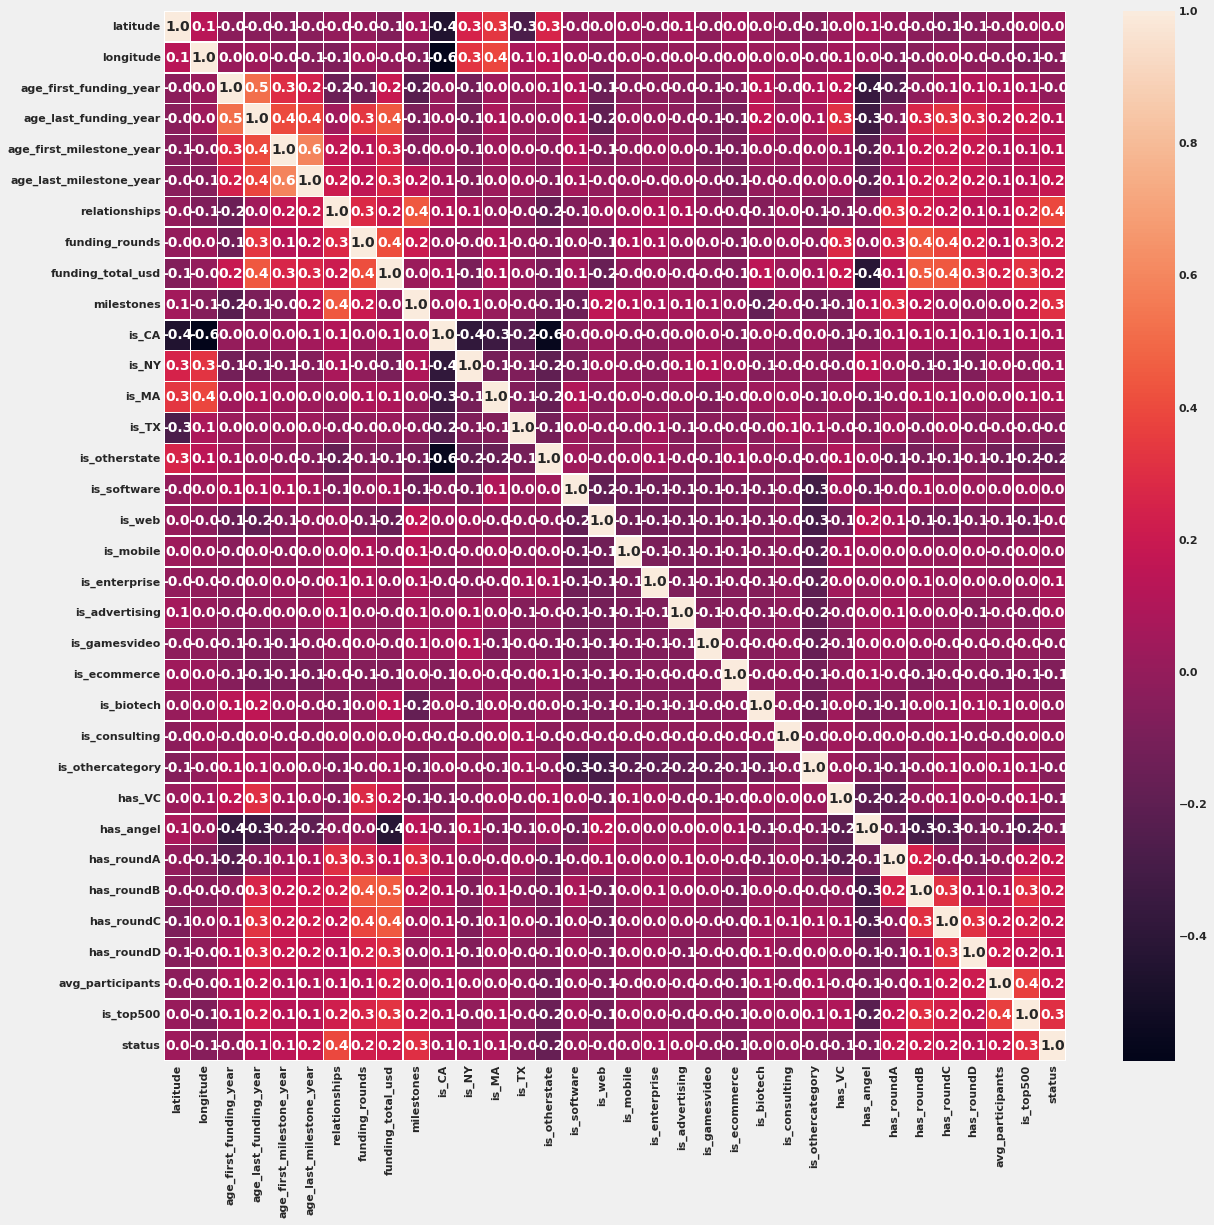

In [23]:
def draw_heatmap(startup_data):
    
    
    f, ax = plt.subplots(figsize = (18, 18))
    
    corrMatt = startup_data.corr(method='kendall')
    
    sns.heatmap(corrMatt, annot = True, linewidth = 0.5, fmt = '.1f', ax = ax)
    plt.show()
    
    
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    
numerical_df_1=startup_data.select_dtypes(numerics)
numerical_column_names = startup_data.select_dtypes(numerics).columns

draw_heatmap(numerical_df_1)

Here we can see the direct correlation with status from how it is shown in the heatmap of the correlation plot.

#**Separating Target variable from the main dataset**

In [24]:
X = startup_data[['relationships', 'milestones', 'is_top500', 'has_roundB', 'funding_rounds', 'age_last_milestone_year',
               'avg_participants', 'has_roundA', 'has_roundC', 'has_roundD', 'age_first_milestone_year', 'is_MA', 
               'is_CA', 'is_enterprise', 'age_last_funding_year', 'is_NY', 'latitude', 'is_advertising', 'is_advertising', 
               'funding_total_usd', 'is_software', 'is_mobile', 'is_consulting', 'is_biotech', 'is_biotech', 'is_web',
               'is_gamesvideo', 'longitude', 'is_othercategory', 'is_TX', 'has_VC', 'is_ecommerce', 'has_angel', 
               'age_first_funding_year', 'is_otherstate']]

In [25]:
X.head()

,relationships,milestones,is_top500,has_roundB,funding_rounds,age_last_milestone_year,avg_participants,has_roundA,has_roundC,has_roundD,...,is_web,is_gamesvideo,longitude,is_othercategory,is_TX,has_VC,is_ecommerce,has_angel,age_first_funding_year,is_otherstate
0,3,3,0,0,3,6.7041,1.0000,0,0,0,...,0,0,-71.056820,1,0,0,0,1,2.2493,0
1,9,1,1,1,4,7.0055,4.7500,0,1,1,...,0,0,-121.973718,0,0,1,0,0,5.1260,0
2,5,2,1,0,1,2.2055,4.0000,1,0,0,...,1,0,-117.192656,0,0,0,0,0,1.0329,0
3,5,1,1,1,3,6.0027,3.3333,0,1,1,...,0,0,-122.050040,0,0,0,0,0,3.1315,0
4,2,1,1,0,2,0.0384,1.0000,0,0,0,...,0,1,-122.419236,0,0,1,0,1,0.0000,0


In [26]:
y = startup_data['status']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: status, dtype: int64

Standardizing our input data

In [27]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data =scale.fit_transform(X)

# **Splitting input and target data into train, test**

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=0)

In [51]:
len(X_train)

738

In [52]:
len(X_test)

185

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


## **Testing the model using the predict function**

In [54]:
y_pred = model.predict(X_test)
y_pred

array([ 0.41502971,  0.16784794,  0.60865132,  1.13569849,  0.24892696,
        0.87051387,  0.37943646,  0.76147459,  0.86939479,  0.50816447,
        0.67726465,  0.61865721,  0.53933846,  0.86751189,  0.8568052 ,
        0.28116916,  0.60926148,  0.22605145,  0.7040903 ,  0.43036122,
        0.53006234,  0.80629879,  0.42742413,  0.82422169,  0.66145303,
        0.68069912,  0.48693742,  0.79017276,  0.57008776,  0.48633677,
        0.78777246,  0.28306738,  0.42908948,  0.72832892,  0.67122036,
        0.80187925,  0.36439044,  0.80442045,  0.83212317,  0.82023924,
        0.49964263,  0.6217825 ,  0.54146992,  0.5833204 ,  0.89021521,
        0.94304042,  0.58069812,  0.50002901,  0.80592482,  0.57885604,
       -5.24950033,  0.75790829,  0.78218182,  0.31174311,  0.84895164,
        0.5843415 ,  0.32630047,  0.47064611,  0.85678421,  0.02746971,
        0.37597249,  0.59402604,  0.17033247,  0.78794646,  0.26749956,
        0.66833447,  0.42231172,  0.5337907 ,  0.30138577,  1.00

Testing Scores and Training Scores

In [55]:
testing_data_model_score = model.score(X_test,y_test)
print("Model Score/Preformance on Testing Data", testing_data_model_score)

training_data_model_score = model.score(X_train,y_train)
print("Model Score/Performance on Training Data",training_data_model_score)

Model Score/Preformance on Testing Data -0.7561169298940551
Model Score/Performance on Training Data 0.2717602143684319


## **Comparing the predicted values and actual values.**

In [56]:
y_test.shape

(185,)

In [57]:
y_pred.shape

(185,)

In [59]:
import numpy as np
y_test = np.array(list(y_test))
y_pred = np.array(y_pred)
df= pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': y_pred.flatten()})
df

,Actual Values,Predicted Values
0,1,0.415030
1,0,0.167848
2,0,0.608651
3,1,1.135698
4,0,0.248927
...,...,...
180,0,0.609961
181,1,0.632707
182,1,0.628246
183,1,0.828638


As we can see the predicted values are close to the actual values presented in the testing set. Hence we can use this model for prediction.

# **Model Evaluation**

## **1. R2 score:**

**What is the r2 score?** ” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by the model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.

## **What is the R2 score in linear regression?**

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

## **What is a good score for R2?**

In other fields, the standards for a good R-Squared reading can be much higher, such as 0.9 or above. In finance, an R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation.

In [76]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test,y_pred)
print("R2 Score of Model is:",r2score)


R2 Score of Model is: -0.7561169298940551


## **2. MSE - Mean Squared Error**

**Mean squared error (MSE)** - measures the error in statistical models by using the average squared difference between observed and predicted values.

### **What does Mean Squared Error tell us?**

The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.

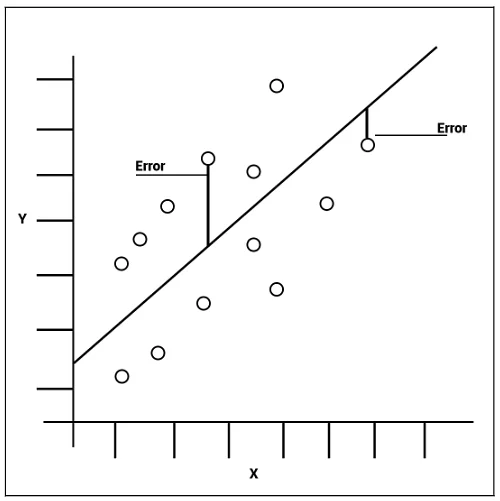


A larger MSE indicates that the data points are dispersed widely around its central moment (mean), whereas a smaller MSE suggests the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean). It reflects the centralized distribution of your data values, the fact that it is not skewed, and, most importantly, it has fewer errors (errors measured by the dispersion of the data points from its mean).

Lesser the MSE => Smaller is the error => Better the estimator.

The Mean Squared Error is calculated as:

MSE = (1/n) * Σ(actual – forecast)2

where:

* Σ – a symbol that means “sum”
* n – sample size
* actual – the actual data value
* predicted – the predicted data value

Reference:
https://www.simplilearn.com/tutorials/statistics-tutorial/mean-squared-error


In [75]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error is:", mse)

Mean Squared Error is: 0.40022533391303516


## **3. RMSE - Root Mean Squared Error**

**Root Mean Square Error (RMSE)** is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how to spread out these residuals. In other words, it tells you how concentrated the data is around the line of best fit.

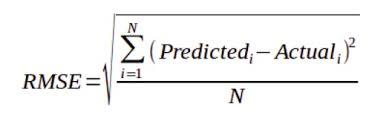


where,

*predictedi* = The predicted value for the ith observation.

*actuali* = The observed(actual) value for the ith observation

*N* = Total number of observations.

In [74]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error is :", rmse )

Root Mean Squared Error is : 0.632633649052147


## **4. MAE - Mean Absolute Error**

Mean Absolute Error is **a model evaluation metric used with regression models**. The mean absolute error of a model with respect to a test set is the mean of the absolute values of the individual prediction errors on over all instances in the test set.

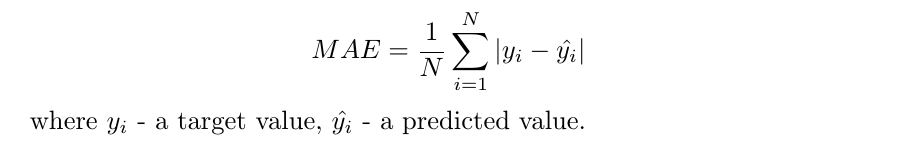



In [73]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error is:", mae )

Mean Absolute Error is: 0.407011429315557
